In [1]:
data_dir='C:\\Users\\asus\\Desktop\\New folder\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\cell_images'

In [2]:
import os


In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
paracell=train_path + 'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

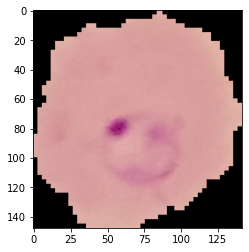

In [12]:
plt.imshow(imread(paracell))

In [13]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [14]:
uninfected_cell=train_path + 'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

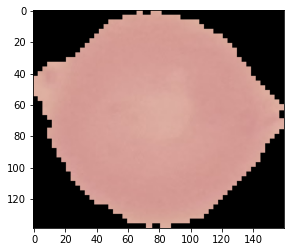

In [15]:
plt.imshow(imread(uninfected_cell))

In [16]:
pwd

'C:\\Users\\asus\\Desktop\\New folder\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\DATA\\cell_images'

In [17]:
len(os.listdir(train_path+'parasitized'))

12480

In [18]:
len(os.listdir(train_path+'uninfected'))

12480

In [19]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    img= imread(test_path+ 'uninfected\\'+image_filename)
    d1,d2,colour=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [20]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


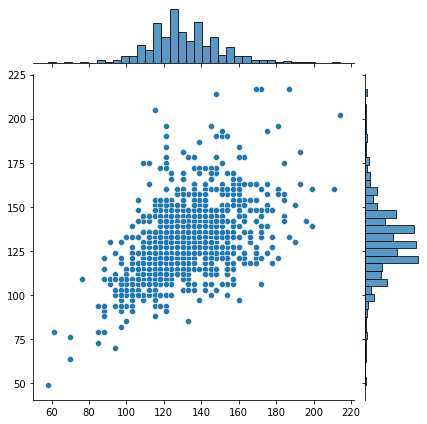

In [21]:
sns.jointplot(dim1,dim2)

In [22]:
np.mean(dim1)

130.92538461538462

In [23]:
np.mean(dim2)

130.75

In [24]:
image_shape=(130,130,3)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [27]:
image_gen=ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest')

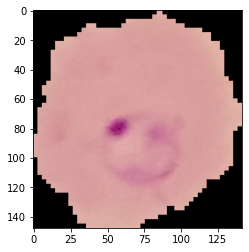

In [28]:
para_image=imread(paracell)
plt.imshow(para_image)
plt.show()

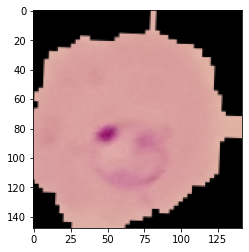

In [29]:
plt.imshow(image_gen.random_transform(para_image))

In [30]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [31]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [32]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

In [62]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [66]:
batch_size=16

In [67]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 24958 images belonging to 2 classes.


In [68]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                            shuffle=False)

Found 2600 images belonging to 2 classes.


In [69]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [70]:
results=model.fit_generator(train_image_gen,epochs=20,
                            validation_data=test_image_gen,
                            callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 213s 136ms/step - loss: 0.6573 - accuracy: 0.8326 - val_loss: 0.2222 - val_accuracy: 0.9338
Epoch 2/20
1560/1560 [==============================] - 205s 132ms/step - loss: 0.2107 - accuracy: 0.9363 - val_loss: 0.2233 - val_accuracy: 0.9285
Epoch 3/20
1560/1560 [==============================] - 313s 201ms/step - loss: 0.2088 - accuracy: 0.9367 - val_loss: 0.1895 - val_accuracy: 0.9377
Epoch 4/20
1560/1560 [==============================] - 485s 311ms/step - loss: 0.2029 - accuracy: 0.9389 - val_loss: 0.2276 - val_accuracy: 0.9342
Epoch 5/20
1560/1560 [==============================] - 218s 140ms/step - loss: 0.1922 - accuracy: 0.9417 - val_loss: 0.1888 - val_accuracy: 0.9408oss: 0.1891 - accuracy - ETA: 36s - loss: 0.1895 - acc - ETA: 34s - ETA: 30s - loss: 0.1889 - acc - ETA: 28s - loss: 0. - ETA: 25s - loss: 0.1906 - a - ETA: 26s - loss: 0.1915 -  - ETA - ETA: 18s - loss: 0.1915 - accuracy: 0.942 - ETA: 18s - loss:  - ETA: 14s -

In [71]:
# save the model in local directory
from tensorflow.keras.models import load_model
model.save('models\malaria_detector.h5')

In [79]:
model_history=pd.DataFrame(model.history.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.657264,0.832639,0.222231,0.933846
1,0.210739,0.936293,0.223290,0.928462
2,0.208827,0.936694,0.189525,0.937692
3,0.202881,0.938897,0.227572,0.934231
4,0.192194,0.941742,0.188761,0.940769
5,0.187653,0.943826,0.179773,0.944231
6,0.186800,0.942784,0.179091,0.944231
7,0.192365,0.943145,0.220274,0.929231
8,0.181285,0.943585,0.176811,0.943846
9,0.177441,0.945108,0.174548,0.943077


In [75]:
import pickle

In [87]:
# save the histor of the model
model_history.to_pickle('history\\malaria_model_history.pickle')

In [89]:
history_pickle=pd.read_pickle('history\\malaria_model_history.pickle')

<AxesSubplot:>

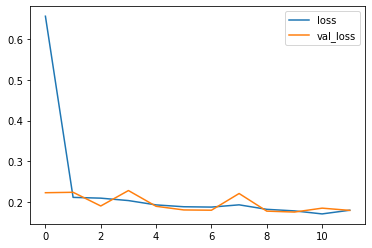

In [92]:
history_pickle[['loss','val_loss']].plot()

<AxesSubplot:>

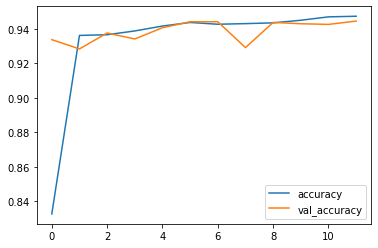

In [93]:
history_pickle[['accuracy','val_accuracy']].plot()

In [95]:
# load the model 
malaria_model= load_model('models\malaria_detector.h5')

In [96]:
malaria_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [100]:
malaria_model.evaluate(test_image_gen)

163/163 [==============================] - 11s 68ms/step - loss: 0.1802 - accuracy: 0.94583s - loss:


[0.1801556497812271, 0.9457692503929138]

In [105]:
pred=model.predict(test_image_gen)

In [114]:
pred=(pred>0.80)*1
pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [115]:
len(pred)

2600

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(test_image_gen.classes,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [118]:
confusion_matrix(test_image_gen.classes,pred)

array([[1211,   89],
       [  55, 1245]], dtype=int64)

In [119]:
paracell

'C:\\Users\\asus\\Desktop\\New folder\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [120]:
from tensorflow.keras.preprocessing import image

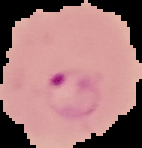

In [121]:
image.load_img(paracell)

In [123]:
# reshapig the image and saving in new variable
my_image = image.load_img(paracell,target_size=image_shape)

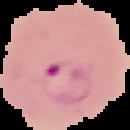

In [124]:
my_image

In [126]:
my_image_array=image.img_to_array(my_image)

In [128]:
my_image_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [129]:
# to make it (1,130,130,3) i.e one image of image_shape
my_image = np.expand_dims(my_image, axis=0)

In [134]:
my_image.shape

(1, 130, 130, 3)

In [136]:
(malaria_model.predict(my_image)>0.5)*1

array([[0]])

In [137]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}